In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [67]:
# column names for the data
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# read in the data and set the column names
df = pd.read_csv('Dataset-2/adult.test', names=columns)
df.drop(0, axis=0, inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [68]:
# percentage of train and test data
print('Test data shape: ', df.shape)

# 1/3 of the data is test data

Test data shape:  (16281, 15)


In [69]:
# find data types of the columns
df.dtypes

age                object
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object

In [70]:
df.isnull().sum()
df.isna().sum()

# look for missing values in the data
df.isnull().sum()
df.isna().sum()

df.shape

(16281, 15)

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


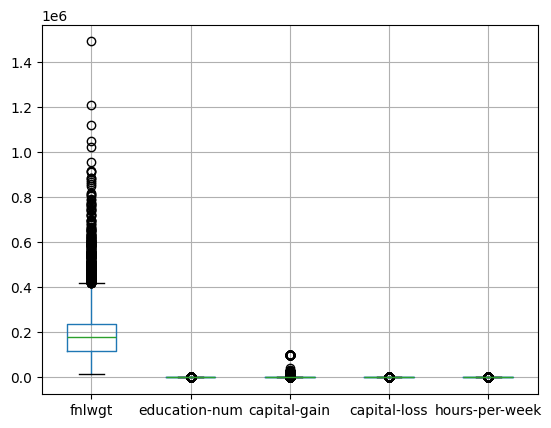

In [71]:
# numerical features of the data
numerical_features = df.select_dtypes(include=['float64'])
numerical_features.columns
# look for outliers in all the numerical columns
df.boxplot(numerical_features.columns.to_list())
df.describe()


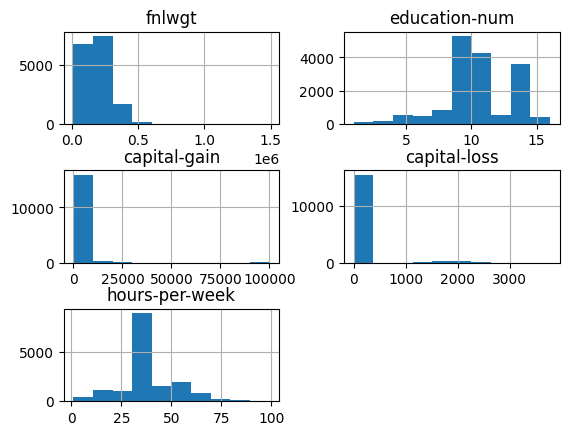

In [72]:
# look for the distribution of the numerical columns
df.hist(numerical_features.columns.to_list())

# increase vertical spacing between the plots
plt.subplots_adjust(hspace=0.5)

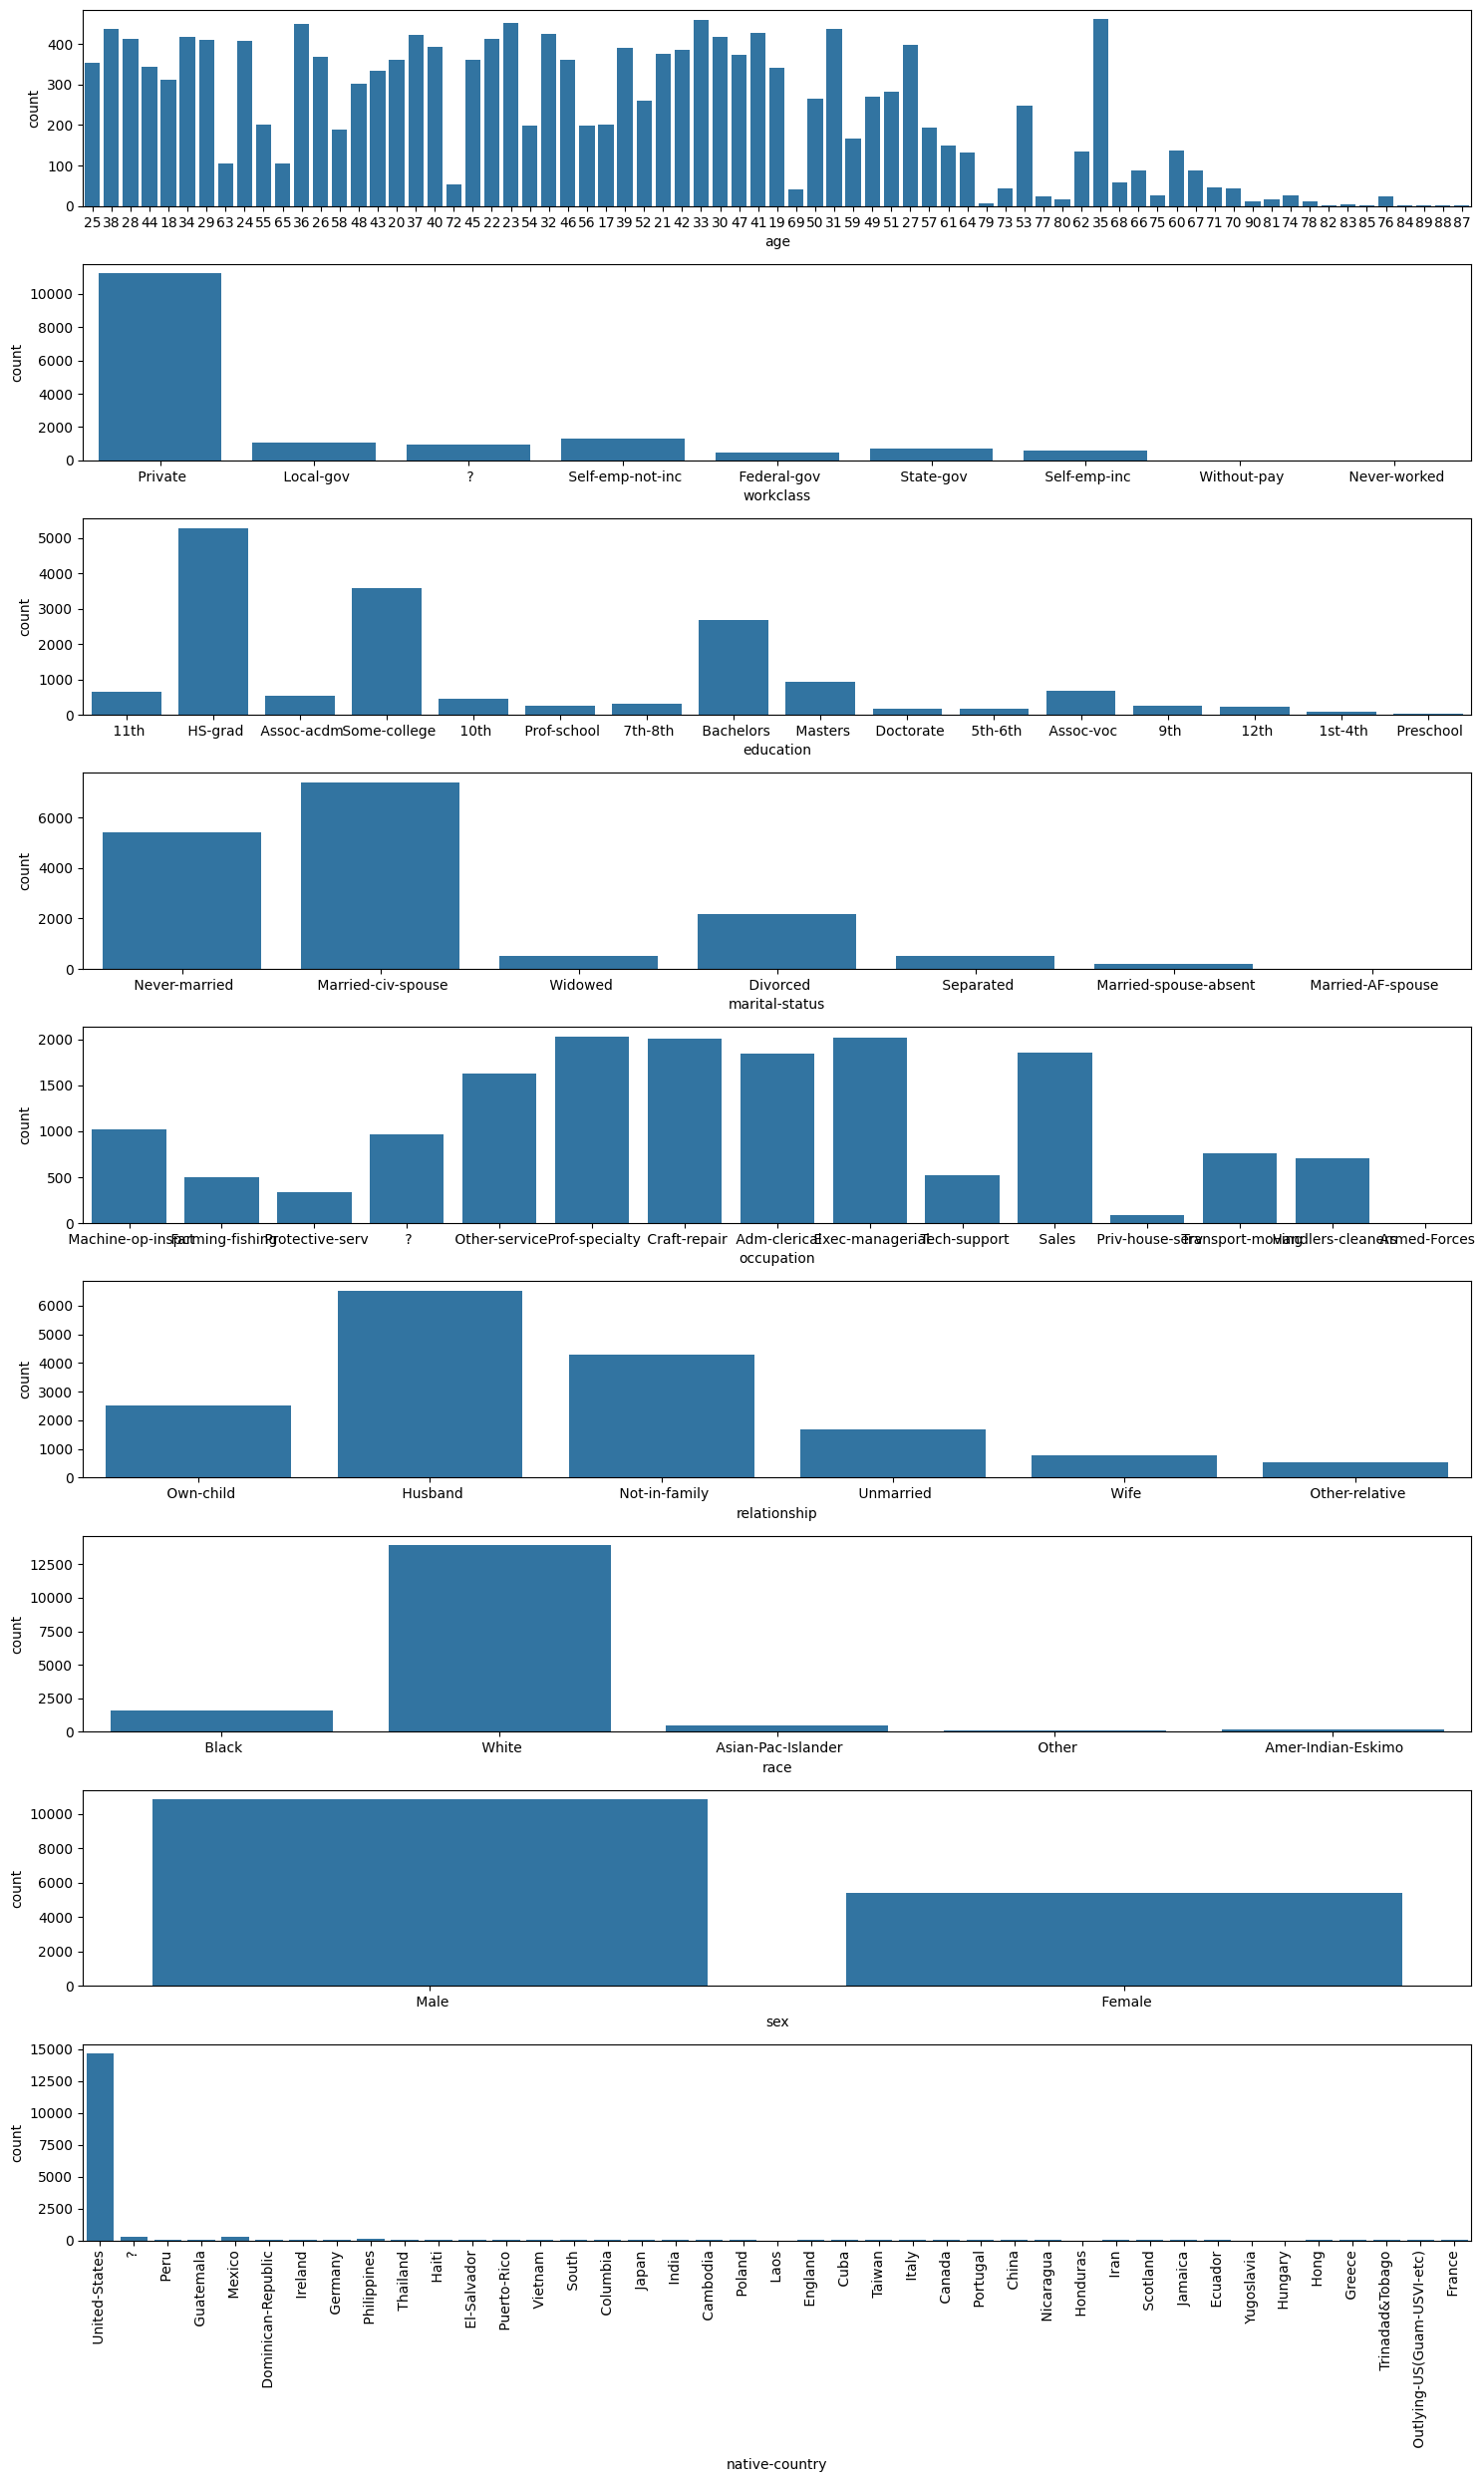

In [73]:
category_features = df.select_dtypes(include=['object'])
category_features.columns

# look for the distribution of the categorical columns
# combine all the plots into one
fig, axes = plt.subplots(9, 1, figsize=(15, 25))
axes = axes.flatten()
for i, j in zip(category_features.columns.to_list(), axes):
    sns.countplot(x=i, data=df, ax=j)
    plt.tight_layout()
    plt.xticks(rotation=90)

In [74]:
# check the unique values of the age column
df['age'] = df['age'].astype('int64')
df['age'].unique()
category_features.drop(['age'], axis=1, inplace=True)

In [75]:
# replace '?' with 'unknown'
df.replace(' ?', 'unknown', inplace=True)

In [76]:
# How many category columns have '?' values
for i in category_features.columns.to_list():
    print(i, df[i].str.contains('\?').sum())


workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0
income 0


In [77]:
# look for values in the category columns with count 0
for i in category_features.columns.to_list():
    print(i, df[i].value_counts().to_dict())

workclass {' Private': 11210, ' Self-emp-not-inc': 1321, ' Local-gov': 1043, 'unknown': 963, ' State-gov': 683, ' Self-emp-inc': 579, ' Federal-gov': 472, ' Without-pay': 7, ' Never-worked': 3}
education {' HS-grad': 5283, ' Some-college': 3587, ' Bachelors': 2670, ' Masters': 934, ' Assoc-voc': 679, ' 11th': 637, ' Assoc-acdm': 534, ' 10th': 456, ' 7th-8th': 309, ' Prof-school': 258, ' 9th': 242, ' 12th': 224, ' Doctorate': 181, ' 5th-6th': 176, ' 1st-4th': 79, ' Preschool': 32}
marital-status {' Married-civ-spouse': 7403, ' Never-married': 5434, ' Divorced': 2190, ' Widowed': 525, ' Separated': 505, ' Married-spouse-absent': 210, ' Married-AF-spouse': 14}
occupation {' Prof-specialty': 2032, ' Exec-managerial': 2020, ' Craft-repair': 2013, ' Sales': 1854, ' Adm-clerical': 1841, ' Other-service': 1628, ' Machine-op-inspct': 1020, 'unknown': 966, ' Transport-moving': 758, ' Handlers-cleaners': 702, ' Tech-support': 518, ' Farming-fishing': 496, ' Protective-serv': 334, ' Priv-house-ser

In [78]:
# count the unique values in the category columns
for i in category_features.columns.to_list():
    print(i, df[i].nunique())

workclass 9
education 16
marital-status 7
occupation 15
relationship 6
race 5
sex 2
native-country 41
income 2


In [79]:
# impute the unknown values with the mode of the column
for i in category_features.columns.to_list():
    df[i] = df[i].replace('unknown', df[i].mode()[0])

In [80]:
# modify the income column to 0 and 1
df['income'] = df['income'].replace(' <=50K', 0)
df['income'] = df['income'].replace(' >50K', 1)

In [81]:
y = df['income']
X = df.drop(['income'], axis=1)
print(X.shape, y.shape)

(16281, 14) (16281,)


In [82]:
category_features.drop(['sex', 'income'], axis=1, inplace=True)
# one hot encode the 'sex' column
X = pd.get_dummies(X, drop_first=True, columns=['sex'])
X = pd.get_dummies(X, columns=category_features.columns.to_list()).astype('int64')
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
1,25,226802,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,89814,9,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,215419,13,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,64,321403,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16279,38,374983,13,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16280,44,83891,13,5455,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [420]:
# print all the columns
print(X.columns.to_list())

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex_ Male', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-m

In [421]:
# count the sum of entries in all the columns
# show the values in a loop of 10 columns

for i in range(0, len(X.columns.to_list()), 10):
    print(X.iloc[:, i:i+10].sum())


age                           1256257
fnlwgt                     6179373392
education-num                  328237
capital-gain                 35089324
capital-loss                  2842700
hours-per-week                1316684
sex_ Male                       21790
workclass_ Federal-gov            960
workclass_ Local-gov             2093
workclass_ Never-worked             7
dtype: int64
workclass_ Private             24532
workclass_ Self-emp-inc         1116
workclass_ Self-emp-not-inc     2541
workclass_ State-gov            1298
workclass_ Without-pay            14
education_ 10th                  933
education_ 11th                 1175
education_ 12th                  433
education_ 1st-4th               168
education_ 5th-6th               333
dtype: int64
education_ 7th-8th          646
education_ 9th              514
education_ Assoc-acdm      1067
education_ Assoc-voc       1382
education_ Bachelors       5355
education_ Doctorate        413
education_ HS-grad        10501
